In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

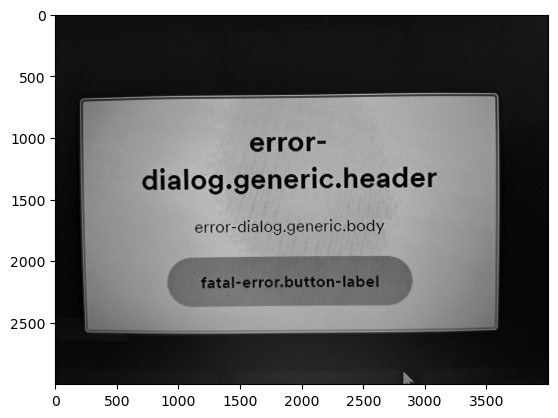

In [2]:
path = "E://Development//Image Processing//basic codes//image data//image2.jpg"
img = cv2.imread(path)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap="gray")

# Contour Detection

Contour is a boundary around something that has well defined edges, so the machine is able to calculate difference in gradient, and form a recognizable shape through continuing change and draw a boundary around it.
When we join all the points on the boundary of an object we get a contour. Typically a specific contour refers to boundary pixels that have the same color and intensity.

## CV2.findContours()
- source/input image: binary image
- mode: Contour retrieval modes
- method: Contour approximation method
### Contour retrieval modes:
1. RETR_EXTERNAL \
stores separate objects excluding internal contours
2. RETR_LIST \
stores all contours
3. RETR_TREE \
stores all contours including their relations upto all levels
4. RETR_CCOMP \
just like tree but stores upto 2 levels

### Contour retrieval methods:
1. CHAIN_APPROX_SIMPLE \
works by storing start and end points of edges in the contour
2. CHAIN_APPROX_NONE \
stores all the points

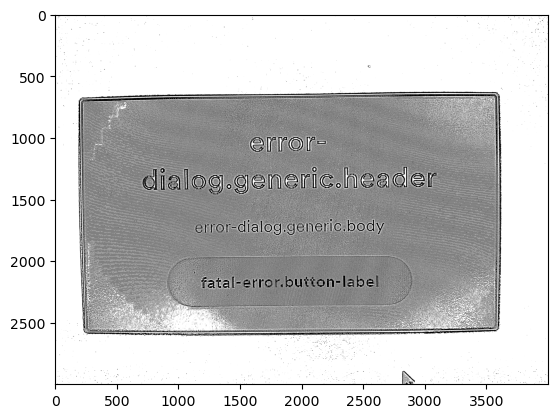

In [6]:
# creating thresholded image since contouring is done on binary image
gaussian_blur_img = cv2.GaussianBlur(img2, (11, 11), 0)
th_img = cv2.adaptiveThreshold(gaussian_blur_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(th_img, cmap="gray")

In [14]:
contours, heirarchies = cv2.findContours(th_img, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)
type(contours), len(contours[0]), type(contours[0])

(tuple, 659, numpy.ndarray)

In [18]:
contours[0].shape

(659, 1, 2)

hi
contours:  (0, 0, 0, 0)


ValueError: zero-size array to reduction operation minimum which has no identity

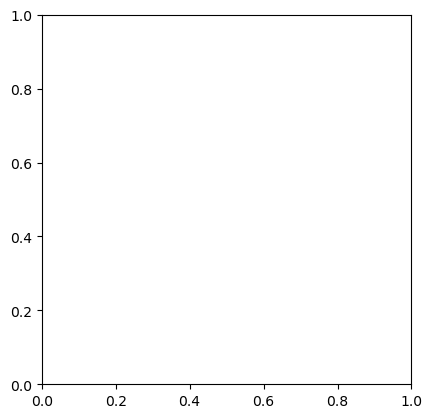

In [23]:
# code for extracting the largest contour
largest_contour = None
second_lar_con = None
largest_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > largest_area:
        print("hi")
        second_lar_con = largest_contour
        largest_contour = cnt
        largest_area = area

x, y, w, h = cv2.boundingRect(second_lar_con)

print("contours: ", (x, y, w, h))
extracted_img = img1[y:y+h, x:x+w]
plt.imshow(extracted_img)